# Covid-19 Basic Plot

March 17, 2020

Johns Hopkins University has put up a very nice [website to track the COVID-19 Pandemic](https://coronavirus.jhu.edu/map.html).
They have also placed the underlying data in a [database of cases on github](https://github.com/CSSEGISandData/COVID-19).  I expect 
they will keep updating this data as time goes on.

I'm just showing the basics of accessing this data and creating your own plots.  Reformatting data so it is easy
to work with Pandas is always kind of a puzzle for me.

In [1]:
%matplotlib inline
import pandas as pd
import requests
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Download the data

Get the raw data (not the HTML-formatted data) and save it locally.

In [2]:
COVID_DATA_URL="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
resp = requests.get(COVID_DATA_URL)
if(resp.ok):
    with open("data/covid_19_timeline.csv","w") as f:
        f.write(resp.text)

### Adjust the data

For some countries, the data has city, county or province data.  I'm looking just for country data, myself.
So, I groupby the country and add it all up.  *I believe this is correct based on some spot checks, but be careful if you "run" with this data and make sure this is accurate!*  

In [3]:
cv19_raw_df = pd.read_csv('data/covid_19_timeline.csv')
cv19_raw_df.set_index('Country/Region', inplace=True)
# convert raw to single value per country (I believe they have orthogonal data)
cv19_sum_df = cv19_raw_df.groupby('Country/Region').sum()
# get rid of the Lat/Lon columns
cv19_sum_df = cv19_sum_df.T[2:]

### See what it looks like

Data is now reformatted how I wanted it for easy plotting.

In [4]:
cv19_sum_df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,occupied Palestinian territory
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


Just a simple cell to help you find country labels.  I was looking for "South Korea", but couldn't find it...

In [5]:
# find a country name...
for c in cv19_sum_df.columns:
    if c.find("Korea") >= 0:
        print(c)

Korea, South


### Plot some countries

Here is a basic plot for a few countries

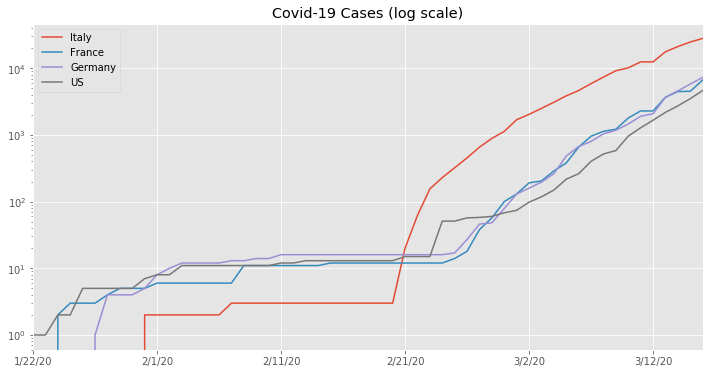

In [6]:
#countries = ["China","Korea, South","Japan","Italy","France","Germany","US"]
countries = ["Italy","France","Germany","US"]
for country in countries:
    cv19_sum_df[country].plot(label=country,figsize=(12,6),logy=True)
plt.title("Covid-19 Cases (log scale)")
x = plt.legend()